## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import os
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
PATH = 'glove_embeddings/glove.6B.50d.txt'
emb_dim = 50

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(base_dir='glove_embeddings', dims=50):
    path = """{base_dir}/glove.6B.{dimensions}d.txt""".format(
        base_dir=base_dir,
        dimensions=str(dims)
    )
    _embeddings = {}
    with open(path, 'r') as f:
        for _, line in enumerate(f):
            emb = line.split()
            _embeddings[emb[0]] = list(map(float, emb[1:]))
    return _embeddings

# Serialize dictionary
def save_embeddings(emb_dict, base_dir='glove_embeddings', dims=50):
    path = """{base_dir}/glove.6B.{dimensions}d.pkl""".format(
        base_dir=base_dir,
        dimensions=str(dims)
    )
    with open(path, 'wb') as f:
        pickle.dump(emb_dict, f)

# Deserialize dictionary
def open_embeddings(base_dir='glove_embeddings', dims=50):
    path = """{base_dir}/glove.6B.{dimensions}d.pkl""".format(
        base_dir=base_dir,
        dimensions=str(dims)
    )
    with open(path, 'rb') as f:
        emb_dict = pickle.load(f)
        return emb_dict

# General func
def get_embeddings(base_dir='glove_embeddings', dims=50):
    if dims not in [50, 100, 300]:
        raise Exception("Unsupported dims")
    path = """{base_dir}/glove.6B.{dimensions}d.pkl""".format(
        base_dir=base_dir,
        dimensions=str(dims)
    )
    if os.path.exists(path):
        return open_embeddings(base_dir, dims)
    else:
        emb = create_emb_dictionary(base_dir, dims)
        save_embeddings(emb, base_dir, dims)
        return emb

In [4]:
# Create dictionary
embeddings_dict = create_emb_dictionary()

In [5]:
embeddings_dict['mexico']

[0.41189,
 -0.093082,
 -0.18871,
 1.0692,
 -0.53433,
 -0.99734,
 -0.55511,
 0.32821,
 0.13527,
 0.56191,
 0.4153,
 -0.76649,
 0.64603,
 -0.18546,
 0.78123,
 -0.89799,
 -0.49891,
 -0.2208,
 -0.13527,
 0.18387,
 -0.71566,
 -0.76888,
 -0.080441,
 0.00049022,
 -0.52532,
 -1.8385,
 0.17512,
 0.33196,
 0.24221,
 -0.56305,
 2.6126,
 -0.0023889,
 -0.5464,
 -0.73415,
 -0.46359,
 -0.75214,
 -1.2924,
 0.2636,
 0.28462,
 0.026416,
 -1.0242,
 0.57252,
 1.4757,
 -1.2457,
 -0.62902,
 0.40549,
 -0.41026,
 -0.60271,
 0.13786,
 -0.079502]

In [6]:
save_embeddings(embeddings_dict)

In [7]:
assert (np.array(embeddings_dict['mexico']) == np.array(open_embeddings()['mexico'])).all() == True

#### See some embeddings

In [8]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [9]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [10]:
def plot_embeddings(words2show, _embeddings_dict, dims=50, func = PCA, base_dir='glove_embeddings', projection=2):
    filtered_emb = dict(filter(
        lambda _x: _x[0] in words2show,
        _embeddings_dict.items()
    ))  
    
    k = list(filtered_emb.keys())
    x = np.array(list(filtered_emb.values()))
    
    dim_red = func(n_components=projection)
    x_t = dim_red.fit_transform(x)
        
    fig = plt.figure(figsize=(16,11))
    if projection == 3:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)
        
    colors = list(map(
        lambda _x: plt.colormaps['hsv'](_x),
        np.linspace(0.0, 1.0, len(k))
    ))
    
    for _i, (word, vector) in enumerate(zip(k, x_t)):
        if projection == 2:
            ax.quiver(0,0, vector[0], vector[1], angles="xy", scale_units="xy", scale = 1, color=colors[_i], label=word, width=0.004)
        else:
            ax.quiver(0,0,0, vector[0], vector[1], vector[2], color=colors[_i], arrow_length_ratio=0.1, label=word)
    
    if projection == 3:
        ax.set_xlim([-3, 5])
        ax.set_ylim([-3, 5])
        ax.set_zlim([-3, 5])
    else:
        ax.set_xlim([-3, 5])
        ax.set_ylim([-3, 5])
    ax.legend(ncol=3)
    
    plt.show()

In [5]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


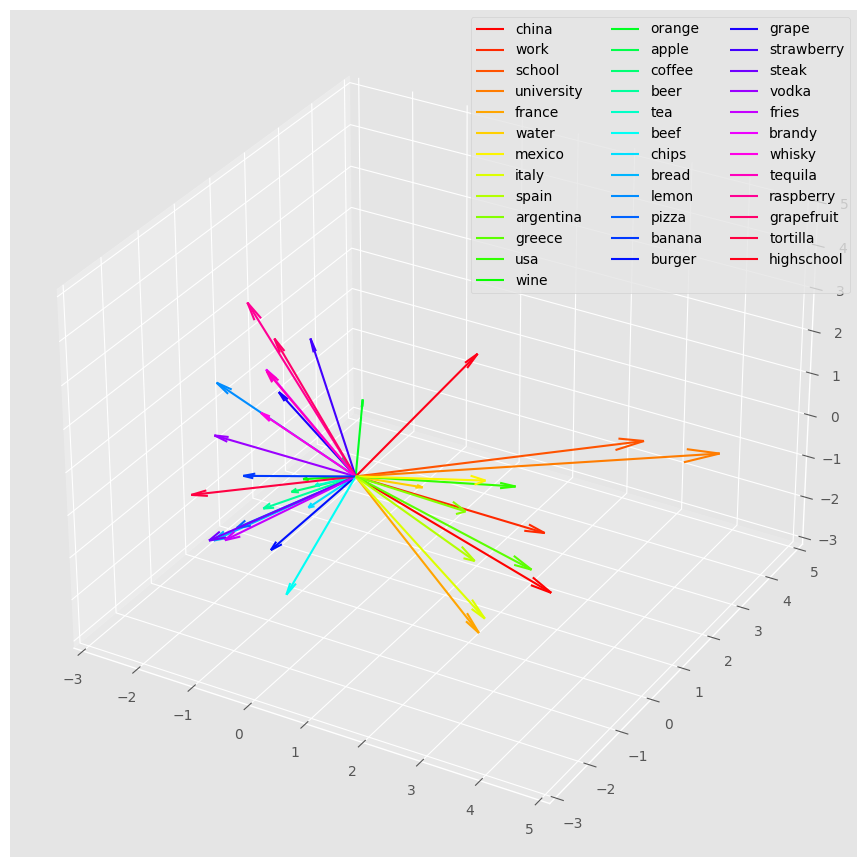

In [12]:
plot_embeddings(words, embeddings_dict, func=PCA, projection=3)

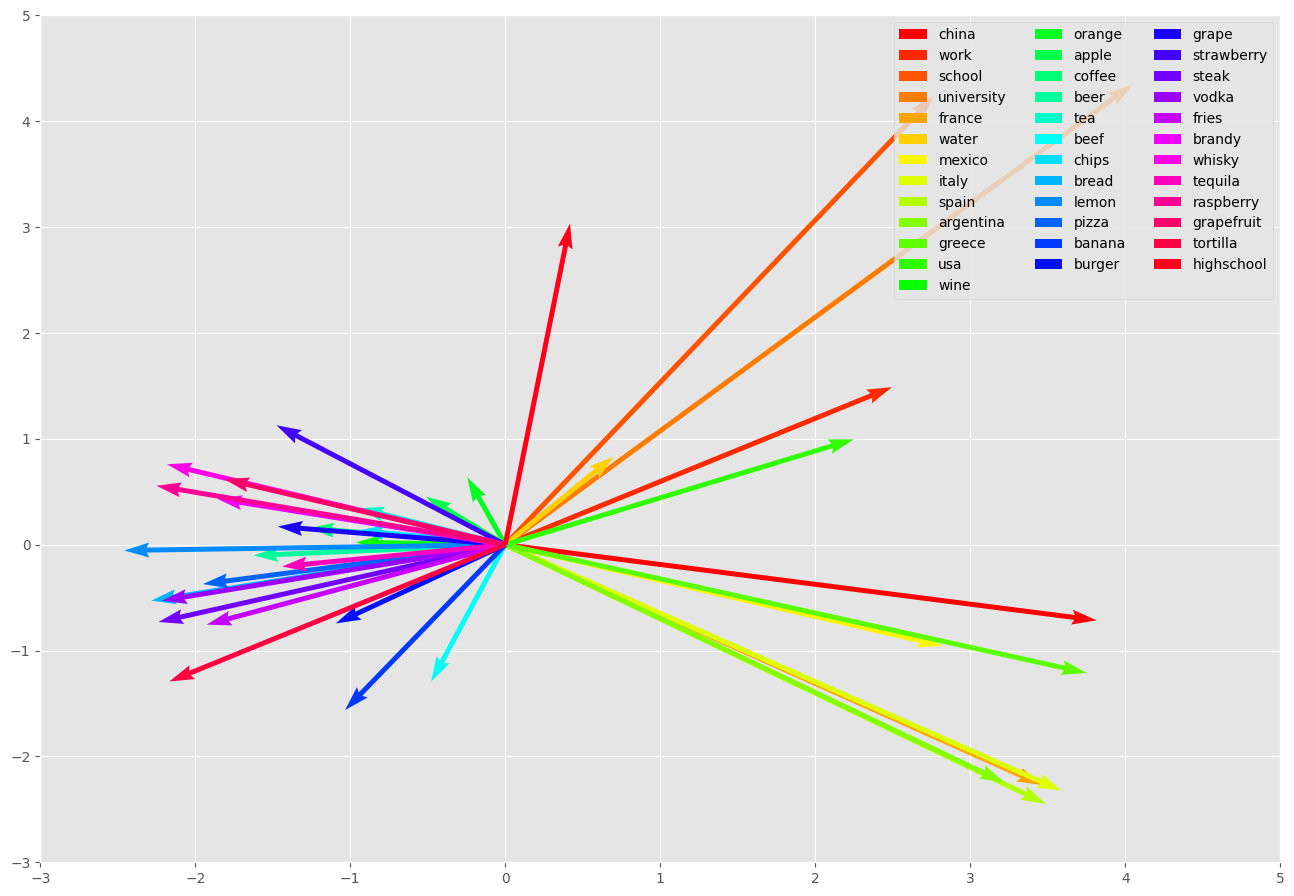

In [13]:
plot_embeddings(words, embeddings_dict, func=PCA, projection=2)

Note: Currently TSNE is not running on Mac systems with Apple Silicon, don't run this commands on Mac, it is going to hang, it works OK on Google Colab

In [ ]:
plot_embeddings(words, embeddings_dict, func=TSNE, projection=3)

In [ ]:
plot_embeddings(words, embeddings_dict, func=TSNE, projection=2)

### Let us compute analogies

In [31]:
def similarity(a: np.array, b: np.array):
    return np.dot(a, b) / (norm(a) * norm(b))
    

In [76]:
# analogy
def analogy(word1, word2, word3, _embeddings_dict):
    vector = np.array(_embeddings_dict[word2]) - \
             np.array(_embeddings_dict[word1]) + \
             np.array(_embeddings_dict[word3])
    _words = [word1, word2, word3]
    max_sim = 0
    analogy_word = ""
        
    for word, emb in _embeddings_dict.items():
        if word in _words:
            continue
        sim = similarity(vector, emb)
        if sim > max_sim:
            analogy_word = word
            max_sim = sim
    
    return analogy_word

In [60]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [73]:
analogy('apple', 'fruit', 'lettuce', embeddings_dict)

'vegetables'

## Most similar words

In [103]:
import heapq

# most similar
def find_most_similar(word, _embeddings_dict, top_n=10):
    arr = []
    vector = np.array(_embeddings_dict[word])
    for _w, emb in _embeddings_dict.items(): # N
        if _w == word:
            continue
            
        sim = similarity(np.array(emb), vector)
        if len(arr) < top_n:
            heapq.heappush(arr, (sim, _w)) # log(M)
        elif sim > arr[0][0]:
            heapq.heappushpop(arr, (sim, _w)) # log(M)
        
    arr = list(map(
        lambda x: (x[1], x[0]),
        arr
    ))
    return arr[::-1]

In [104]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [105]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> colombia
3 ---> venezuela
4 ---> chile
5 ---> rico
6 ---> puerto
7 ---> peru
8 ---> cuba
9 ---> guatemala
10 ---> panama
